# Analyse output wam2layers floodcase 2021

In [1]:
import pandas as pd
import xarray as xr
import numpy as np
import os
import matplotlib.pyplot as plt
import cmocean

import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from matplotlib.colors import LinearSegmentedColormap
from shapely.geometry.polygon import LinearRing

In [2]:
def get_grid_info(latitude, longitude):
    """Return grid cell area and lenght sides."""
    dg = 111089.56  # [m] length of 1 degree latitude
    erad = 6.371e6  # [m] Earth radius

    gridcell = np.abs(longitude[1] - longitude[0])  # [degrees] grid cell size

    # new area size calculation:
    lat_n_bound = np.minimum(90.0, latitude + 0.5 * gridcell)
    lat_s_bound = np.maximum(-90.0, latitude - 0.5 * gridcell)

    a_gridcell = np.zeros([len(latitude), 1])
    a_gridcell[:, 0] = (
        (np.pi / 180.0)
        * erad ** 2
        * abs(np.sin(lat_s_bound * np.pi / 180.0) - np.sin(lat_n_bound * np.pi / 180.0))
        * gridcell
    )

    l_ew_gridcell = gridcell * dg  # [m] length eastern/western boundary of a cell
    l_n_gridcell = (
        dg * gridcell * np.cos((latitude + gridcell / 2) * np.pi / 180)
    )  # [m] length northern boundary of a cell
    l_s_gridcell = (
        dg * gridcell * np.cos((latitude - gridcell / 2) * np.pi / 180)
    )  # [m] length southern boundary of a cell
    l_mid_gridcell = 0.5 * (l_n_gridcell + l_s_gridcell)
    return a_gridcell, l_ew_gridcell, l_mid_gridcell

# Load data
u = xr.open_dataset('/data/volume_2/era5_2021/FloodCase_202107_u.nc')
    
# Get grid info
lat = u.latitude.values
lon = u.longitude.values
a_gridcell, l_ew_gridcell, l_mid_gridcell = get_grid_info(lat, lon)

In [3]:
# open region for which the tracking is performed
region = xr.open_dataset('/data/volume_2/era5_2021/region_flood.nc').region_flood.values

# open multiple datasets in once
dsall = xr.open_mfdataset('../output_data_2021/backtrack/2021-*_s_track.nc', concat_dim='time', combine='nested')
E_track_total = (dsall.e_track / a_gridcell) * 1000 # mm
E_track_sumtime = E_track_total.sum(dim='time') # mm

S_track_upper  = (dsall.s_track_upper / a_gridcell) * 1000  # mm
S_track_lower  = (dsall.s_track_lower / a_gridcell) * 1000  # mm
north_loss = (dsall.north_loss / a_gridcell[0]) * 1000 # mm
south_loss = (dsall.south_loss / a_gridcell[-1]) * 1000 # mm
east_loss = (dsall.east_loss / np.squeeze(a_gridcell)) * 1000 # mm
west_loss = (dsall.west_loss / np.squeeze(a_gridcell)) * 1000 # mm

#open the tracking only performed on 15july
dsall_15juli = xr.open_mfdataset('../output_data_2021/backtrack_15juli/2021-*_s_track.nc', concat_dim='time', combine='nested')
E_track_total_15juli = (dsall_15juli.e_track / a_gridcell) * 1000 # mm
E_track_sumtime_15juli = E_track_total_15juli.sum(dim='time') # mm

S_track_upper_15juli  = (dsall_15juli.s_track_upper / a_gridcell) * 1000  # mm
S_track_lower_15juli  = (dsall_15juli.s_track_lower / a_gridcell) * 1000  # mm
north_loss_15juli = (dsall_15juli.north_loss / a_gridcell[0]) * 1000 # mm
south_loss_15juli = (dsall_15juli.south_loss / a_gridcell[-1]) * 1000 # mm
east_loss_15juli = (dsall_15juli.east_loss / np.squeeze(a_gridcell)) * 1000 # mm
west_loss_15juli = (dsall_15juli.west_loss / np.squeeze(a_gridcell)) * 1000 # mm

#open the tracking only performed on 14july
dsall_14juli = xr.open_mfdataset('../output_data_2021/backtrack_14juli/2021-*_s_track.nc', concat_dim='time', combine='nested')
E_track_total_14juli = (dsall_14juli.e_track / a_gridcell) * 1000 # mm
E_track_sumtime_14juli = E_track_total_14juli.sum(dim='time') # mm

S_track_upper_14juli  = (dsall_14juli.s_track_upper / a_gridcell) * 1000  # mm
S_track_lower_14juli  = (dsall_14juli.s_track_lower / a_gridcell) * 1000  # mm
north_loss_14juli = (dsall_14juli.north_loss / a_gridcell[0]) * 1000 # mm
south_loss_14juli = (dsall_14juli.south_loss / a_gridcell[-1]) * 1000 # mm
east_loss_14juli = (dsall_14juli.east_loss / np.squeeze(a_gridcell)) * 1000 # mm
west_loss_14juli = (dsall_14juli.west_loss / np.squeeze(a_gridcell)) * 1000 # mm

#open the tracking only performed on 13july
dsall_13juli = xr.open_mfdataset('../output_data_2021/backtrack_13juli/2021-*_s_track.nc', concat_dim='time', combine='nested')
E_track_total_13juli = (dsall_13juli.e_track / a_gridcell) * 1000 # mm
E_track_sumtime_13juli = E_track_total_13juli.sum(dim='time') # mm

S_track_upper_13juli  = (dsall_13juli.s_track_upper / a_gridcell) * 1000  # mm
S_track_lower_13juli  = (dsall_13juli.s_track_lower / a_gridcell) * 1000  # mm
north_loss_13juli = (dsall_13juli.north_loss / a_gridcell[0]) * 1000 # mm
south_loss_13juli = (dsall_13juli.south_loss / a_gridcell[-1]) * 1000 # mm
east_loss_13juli = (dsall_13juli.east_loss / np.squeeze(a_gridcell)) * 1000 # mm
west_loss_13juli = (dsall_13juli.west_loss / np.squeeze(a_gridcell)) * 1000 # mm

#load precipitation data
lsp = xr.open_dataset('/data/volume_2/era5_2021/FloodCase_202107_lsp.nc')['lsp'] # m
cp = xr.open_dataset('/data/volume_2/era5_2021/FloodCase_202107_cp.nc')['cp'] # m
tp = lsp + cp
del(lsp,cp)
#precip_sum_region = tp.sum(dim='time')*region*1000
#print(precip_sum_region.sum())

precip_region_event = tp.sel(time=slice('2021-07-13','2021-07-15')) * 1000 * region # mm
precip_region_event_sum = precip_region_event.sum(dim='time')

In [4]:
#load fluxes
dspreprocess = xr.open_mfdataset('../preprocessed_data_2021/2021-*_fluxes_storages.nc', concat_dim='time', combine='nested')

print(dspreprocess.fx_upper.resample(time='1D').mean(dim='time'))

#def get_totalflux(dataset):
#    fx  = dataset.fa_e_upper + dataset.fa_e_lower
#    fy  = dataset.fa_n_upper + dataset.fa_n_lower
#    return fx.mean(dim='time')[::5,::5], fy.mean(dim='time')[::5,::5]
           
#print(dsfluxes1507)
#print(get_totalflux(dsfluxes1507))

<xarray.DataArray 'fx_upper' (time: 15, latitude: 121, longitude: 321)>
dask.array<stack, shape=(15, 121, 321), dtype=float64, chunksize=(1, 121, 321), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2021-07-01 2021-07-02 ... 2021-07-15
  * longitude  (longitude) float32 -50.0 -49.75 -49.5 -49.25 ... 29.5 29.75 30.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 30.5 30.25 30.0


In [5]:
print(north_loss.values.sum())
print(south_loss.values.sum())
print(east_loss.values.sum())
print(west_loss.values.sum())
print(S_track_upper.values.sum())
print(S_track_lower.values.sum())
print(E_track_total.values.sum())

print(precip_region_event_sum.values.sum())

1407.8444778254873
582.9932372494015
656.9406335398905
4932.914873330863
49688.73614852278
60753.93611980081
8379.509381203256
18477.62958072871


In [6]:
#make figures
def load_flood_map(ax):
    ax.add_feature(cartopy.feature.COASTLINE, linewidth=0.8)
    ax.add_feature(cartopy.feature.BORDERS, linestyle='-', linewidth=.2)

    ax.set_xticks(np.arange(-180, 181, 10), crs=my_projection)
    ax.set_yticks(np.arange(-90, 91, 10), crs=my_projection)
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    ax.set_xlim(-50, 30)
    ax.set_ylim(30, 60)
    
    #add region
    lons = [4, 4, 9, 9]
    lats = [49, 52, 52, 49]
    ring = LinearRing(list(zip(lons, lats)))
    ax.add_geometries([ring], my_projection, facecolor='none', edgecolor='black')

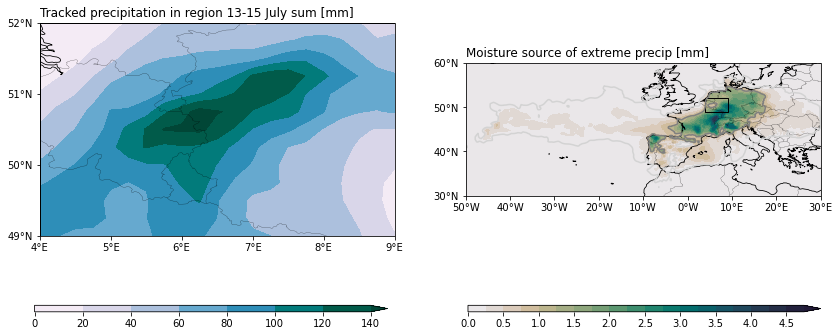

In [11]:
E_track_levels = np.arange(0.0,5.0,0.25)
E_track_anomaly_levels = np.arange(-10.0,11,1)
Z500_levels = np.arange(4700,5900,50)
nq =10 

my_projection = ccrs.PlateCarree(central_longitude=0)

fig1 = plt.figure(figsize=(14, 6))

ax1 = plt.subplot(121, projection = my_projection)
cb1 = ax1.contourf(lon, lat, precip_region_event.sum(dim='time'), cmap=plt.cm.PuBuGn, extend='max') 
load_flood_map(ax1)
ax1.set_yticks(np.arange(-90, 91, 1), crs=my_projection)
ax1.set_xticks(np.arange(-180, 181, 1), crs=my_projection)
ax1.set_xlim(4, 9)
ax1.set_ylim(49, 52)
ax1.set_title('Tracked precipitation in region 13-15 July sum [mm]', loc = 'left')

ax2 = plt.subplot(122, projection = my_projection)
cb2 = ax2.contourf(lon, lat, E_track_sumtime, E_track_levels, cmap=cmocean.cm.rain, extend='max') 
ax2.contour(lon, lat, E_track_sumtime, [0.1,1], colors=['lightgrey','grey']) 
load_flood_map(ax2)
ax2.set_title('Moisture source of extreme precip [mm]', loc = 'left')

new_axis= fig1.add_axes([0.55, 0.08, 0.35, 0.015])
fig1.colorbar(cb2, cax=new_axis, orientation='horizontal')

new_axis2= fig1.add_axes([0.12, 0.08, 0.35, 0.015])
fig1.colorbar(cb1, cax=new_axis2, orientation='horizontal')
fig1.savefig('Moisturesource_extremeevent.png',dpi=300)

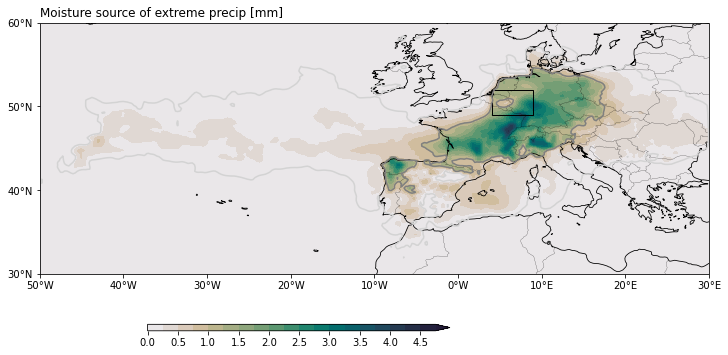

In [14]:
E_track_levels = np.arange(0.0,5.0,0.25)
E_track_anomaly_levels = np.arange(-10.0,11,1)
Z500_levels = np.arange(4700,5900,50)
nq =10 

my_projection = ccrs.PlateCarree(central_longitude=0)

fig1 = plt.figure(figsize=(12, 6))
ax1 = plt.subplot(111, projection = my_projection)

cb2 = ax1.contourf(lon, lat, E_track_sumtime, E_track_levels, cmap=cmocean.cm.rain, extend='max') 
ax1.contour(lon, lat, E_track_sumtime, [0.1,1], colors=['lightgrey','grey']) 
ax1.set_title('Moisture source of extreme precip [mm]', loc = 'left')
load_flood_map(ax1)
new_axis= fig1.add_axes([0.25, 0.08, 0.35, 0.015])
fig1.colorbar(cb2, cax=new_axis, orientation='horizontal')
fig1.savefig('Moisturesource_extremeevent1.png',dpi=300)

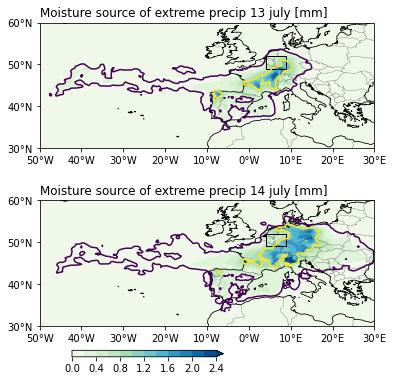

In [16]:
E_track_levels = np.arange(0.0,2.5,0.2)

fig1 = plt.figure(figsize=(6, 6))

ax1 = plt.subplot(211, projection = my_projection)
cb1 = ax1.contourf(lon, lat, E_track_sumtime_13juli, E_track_levels, cmap=plt.cm.GnBu, extend='max') 
ax1.contour(lon, lat, E_track_sumtime_13juli, [0.1,1]) 
load_flood_map(ax1)
ax1.set_title('Moisture source of extreme precip 13 july [mm]', loc = 'left')

ax2 = plt.subplot(212, projection = my_projection)
cb2 = ax2.contourf(lon, lat, E_track_sumtime_14juli, E_track_levels, cmap=plt.cm.GnBu, extend='max') 
ax2.contour(lon, lat, E_track_sumtime_14juli, [0.1,1]) 
load_flood_map(ax2)
ax2.set_title('Moisture source of extreme precip 14 july [mm]', loc = 'left')

#ax3 = plt.subplot(313, projection = my_projection)
#cb3 = ax3.contourf(lon, lat, E_track_sumtime_15juli, E_track_levels, cmap=plt.cm.GnBu, extend='max') 
#ax3.contour(lon, lat, E_track_sumtime_15juli, [0.1,1]) 
#load_flood_map(ax3)
#ax3.set_title('Moisture source of extreme precip 15 july [mm]', loc = 'left')

new_axis2= fig1.add_axes([0.2, 0.08, 0.35, 0.015])
fig1.colorbar(cb1, cax=new_axis2, orientation='horizontal')
fig1.savefig('Moisturesource_perprecipday.png')

In [52]:
#check closure 15 july
precip_region_event_15juli = tp.sel(time=('2021-07-15')) * 1000 * region # mm
precip_region_event_sum_15juli = precip_region_event_15juli.sum(dim='time')
print(precip_region_event_sum_15juli.values.sum())
print((E_track_sumtime_15juli.values.sum() + north_loss_15juli.values.sum() + \
       south_loss_15juli.values.sum() + east_loss_15juli.values.sum() + \
       west_loss_15juli.values.sum()) /precip_region_event_15juli.sum(dim='time').sum())

2509.799497600645
<xarray.DataArray ()>
array(0.79357072)


In [53]:
#check closure 14 july
precip_region_event_14juli = tp.sel(time=('2021-07-14')) * 1000 * region # mm
precip_region_event_sum_14juli = precip_region_event_14juli.sum(dim='time')
print(precip_region_event_sum_14juli.values.sum())
print((E_track_sumtime_14juli.values.sum() + north_loss_14juli.values.sum() + \
       south_loss_14juli.values.sum() + east_loss_14juli.values.sum() + \
       west_loss_14juli.values.sum()) /precip_region_event_14juli.sum(dim='time').sum())

9410.69910966605
<xarray.DataArray ()>
array(0.86509159)


In [54]:
#check closure 13 july
precip_region_event_13juli = tp.sel(time=('2021-07-13')) * 1000 * region # mm
precip_region_event_sum_13juli = precip_region_event_13juli.sum(dim='time')
print(precip_region_event_sum_13juli.values.sum())
print((E_track_sumtime_13juli.values.sum() + north_loss_13juli.values.sum() + \
       south_loss_13juli.values.sum() + east_loss_13juli.values.sum() + \
       west_loss_13juli.values.sum()) /precip_region_event_13juli.sum(dim='time').sum())

6557.130973462015
<xarray.DataArray ()>
array(0.88837277)


In [ ]:
precip_region_event_15juli.sel(time=('2021-07-15'))

<xarray.DataArray (time: 24, latitude: 121, longitude: 321)>
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
...
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])
Coordinates:
  * time       (time) datetime64[ns] 2021-07-15 ... 2021-07-15T23:00:00
  * longitude  (longitude) float32 -50.0 -49.75 -49.5 -49.25 ... 29.5 29.75 30.0
  * latitude   (latitude) float32 60.0 59.75 59.5 59.25 ... 30.5 30.25 30.0

AttributeError: 'Dataset' object has no attribute 'fa_e_upper'

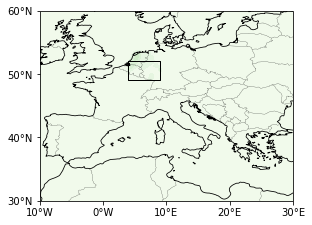

In [19]:
#plot E-track day by day
E_track_levels = np.arange(0.0,1.6,0.1)
E_track_anomaly_levels = np.arange(-10.0,11,1)
Z500_levels = np.arange(4700,5900,50)
nq =10 

my_projection = ccrs.PlateCarree(central_longitude=0)

fig1 = plt.figure(figsize=(10, 14))

ax1 = plt.subplot(321, projection = my_projection)
cb1 = ax1.contourf(lon, lat, E_track_total[-1], E_track_levels, cmap=plt.cm.GnBu, extend='max') 
load_flood_map(ax1)
ax1.quiver(lon[::5],lat[::5], get_totalflux(dsfluxes1507)[0], get_totalflux(dsfluxes1507)[1], \
           color = 'black', width = 0.003, alpha =0.5)
ax1.set_title('Moisture source 15-07', loc='left')

ax2 = plt.subplot(322, projection = my_projection)
cb1 = ax2.contourf(lon, lat, E_track_total[-2], E_track_levels, cmap=plt.cm.GnBu, extend='max')
load_flood_map(ax2)
ax2.quiver(lon[::5],lat[::5], get_totalflux(dsfluxes1407)[0], get_totalflux(dsfluxes1407)[1],\
           color = 'black', width = 0.003, alpha =0.5)
ax2.set_title('Moisture source 14-07', loc='left')

ax3 = plt.subplot(323, projection = my_projection)
cb1 = ax3.contourf(lon, lat, E_track_total[-3], E_track_levels, cmap=plt.cm.GnBu, extend='max') 
load_flood_map(ax3)
ax3.quiver(lon[::5],lat[::5], get_totalflux(dsfluxes1307)[0], get_totalflux(dsfluxes1307)[1], \
           color = 'black', width = 0.003, alpha =0.5)
ax3.set_title('Moisture source 13-07', loc='left')

ax4 = plt.subplot(324, projection = my_projection)
cb1 = ax4.contourf(lon, lat, E_track_total[-4], E_track_levels, cmap=plt.cm.GnBu, extend='max') 
load_flood_map(ax4)
ax4.quiver(lon[::5],lat[::5], get_totalflux(dsfluxes1207)[0], get_totalflux(dsfluxes1207)[1],\
           color = 'black', width = 0.003, alpha =0.5)
ax4.set_title('Moisture source 12-07', loc='left')

ax5 = plt.subplot(325, projection = my_projection)
cb1 = ax5.contourf(lon, lat, E_track_total[-5], E_track_levels, cmap=plt.cm.GnBu, extend='max') 
load_flood_map(ax5)
ax5.quiver(lon[::5],lat[::5], get_totalflux(dsfluxes1107)[0], get_totalflux(dsfluxes1107)[1],\
           color = 'black', width = 0.003, alpha =0.5)
ax5.set_title('Moisture source 11-07', loc='left')

ax6 = plt.subplot(326, projection = my_projection)
cb2 = ax6.contourf(lon, lat, E_track_total[-6], E_track_levels, cmap=plt.cm.GnBu, extend='max') 
load_flood_map(ax6)
ax6.quiver(lon[::5],lat[::5], get_totalflux(dsfluxes1007)[0], get_totalflux(dsfluxes1007)[1],\
           color = 'black', width = 0.003, alpha =0.5)
ax6.set_title('Moisture source 10-07', loc='left')

new_axis2= fig1.add_axes([0.25, 0.08, 0.35, 0.015])
fig1.colorbar(cb1, cax=new_axis2, orientation='horizontal')
fig1.savefig('Moisturesource_perday.png')

In [56]:
E_track_total[-10].values.max()

0.523276835213982

In [45]:
#check closure
print((E_track_sumtime.values.sum()+north_loss.values.sum()+south_loss.values.sum()+ \
       east_loss.values.sum()+west_loss.values.sum()))

print((E_track_sumtime.values.sum()+north_loss.values.sum()+south_loss.values.sum()+ \
       east_loss.values.sum()+west_loss.values.sum())/precip_region_event.sum(dim='time').sum())

16126.826053650428
<xarray.DataArray ()>
array(0.8727757)
